## UAS DATA MINING
#### 3 Januari 2023
### Nama : Bayu Wicaksono
### NIM : 2106836

#### Skenario
IPM (Indeks Pembangunan Manusia) adalah ukuran kualitas sumber daya manusia. Dimana PMI ini memiliki 3 dimensi yaitu umur panjang dan hidup sehat, pengetahuan, dan standar hidup layak. PMI dihitung menggunakan data harapan hidup, rata-rata lama sekolah, dan pengeluaran per kapita.

#### Task
Memprediksi tingkat PMI per provinsi dengan diberikan berbagai dataset yang dapat digunakan untuk memprediksi.

### Import library

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import joblib
from sklearn.impute import SimpleImputer

### Read Files

In [2]:
df1 = pd.read_csv("C:\\Users\\Byebay\\data mining\\Klasifikasi\\UAS\\dataset\\ketidak_cukupan_pangan_prov.csv")
df1.head()

,tahun,pct_tdk_cukup_pangan,prov
0,2021,6.90,ACEH
1,2021,6.33,SUMATERA UTARA
2,2021,6.02,SUMATERA BARAT
3,2021,10.61,RIAU
4,2021,9.25,JAMBI


### Alasan memilih dataset

saya memilih dataset ketidakcukupan pangan provinsi karena salah satu dari dimensi PMI adalah umur panjang dan hidup sehat, dengan dataset ini saya ingin mengetahui bagaimana kondisi pangan untuk setiap provinsi

### PRAPROSES, EDA

### Dataset ketidak_cukupan_pangan_prov

In [3]:
# Melihat informasi mengenai dataframe
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tahun                 175 non-null    int64  
 1   pct_tdk_cukup_pangan  175 non-null    float64
 2   prov                  175 non-null    object 
dtypes: float64(1), int64(1), object(1)
memory usage: 4.2+ KB


In [4]:
# Mengubah datatype prov menjadi kategori
df1['prov'] = df1['prov'].astype('category')

In [5]:
# Melihat atribut yang null pada
df1.isna().sum()

tahun                   0
pct_tdk_cukup_pangan    0
prov                    0
dtype: int64

In [6]:
# Drop provinsi Indonesia karena Indonesia itu termasuk ke suatu negara bukan provinsi
df1.drop(df1[df1['prov'] == "INDONESIA"].index, inplace = True)

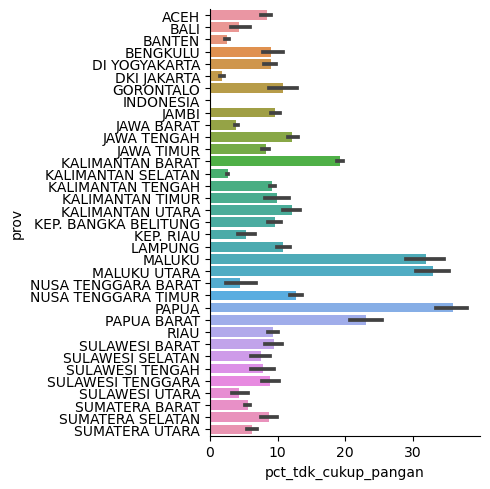

In [7]:
# Visualisasi untuk melihat persentasi ketidakcukupan pangan untuk setiap provinsi untuk periode 2017-2021
sns.catplot(data=df1, x="pct_tdk_cukup_pangan", y="prov", kind="bar")

#### ANALISIS
Jika dilihat provinsi yang ada di pulau Sumatera, Kalimantan, Jawa, Bali, NTT, NTB, Sulawesi mayoritas memiliki persentase yang kecil, yaitu dibawah 20% jika dibandingkan dengan provinsi yang ada di pulau Papua dan Maluku. Terlihat provinsi yang ada di pulau Papua dan Maluku memiliki persentase yang tinggi diatas 20%.

Salah satu provinsi di pulau Kalimantan yaitu Kalimantan Barat memiliki persentasi yang cukup tinggi juga, yaitu sekitar 19%. Terlihat juga provinsi yang memiliki persentasi yang paling kecil yaitu DKI Jakarta, yaitu sekitar 1%. Hal ini terjadi kemungkinan karena DKI Jakarta adalah Ibukota dari Indonesia sehingga provinsi tersebut menjadi pusat dari Indonesianya, seperti pemerintahan itu sendiri, oleh karena itu kebutungan pangan, sandang, dan papan juga pasti tersedia banyak disana.

In [8]:
# Melihat jumlah dari unique values pada atribut tahun
df1.tahun.value_counts()

2021    34
2020    34
2019    34
2018    34
2017    34
Name: tahun, dtype: int64

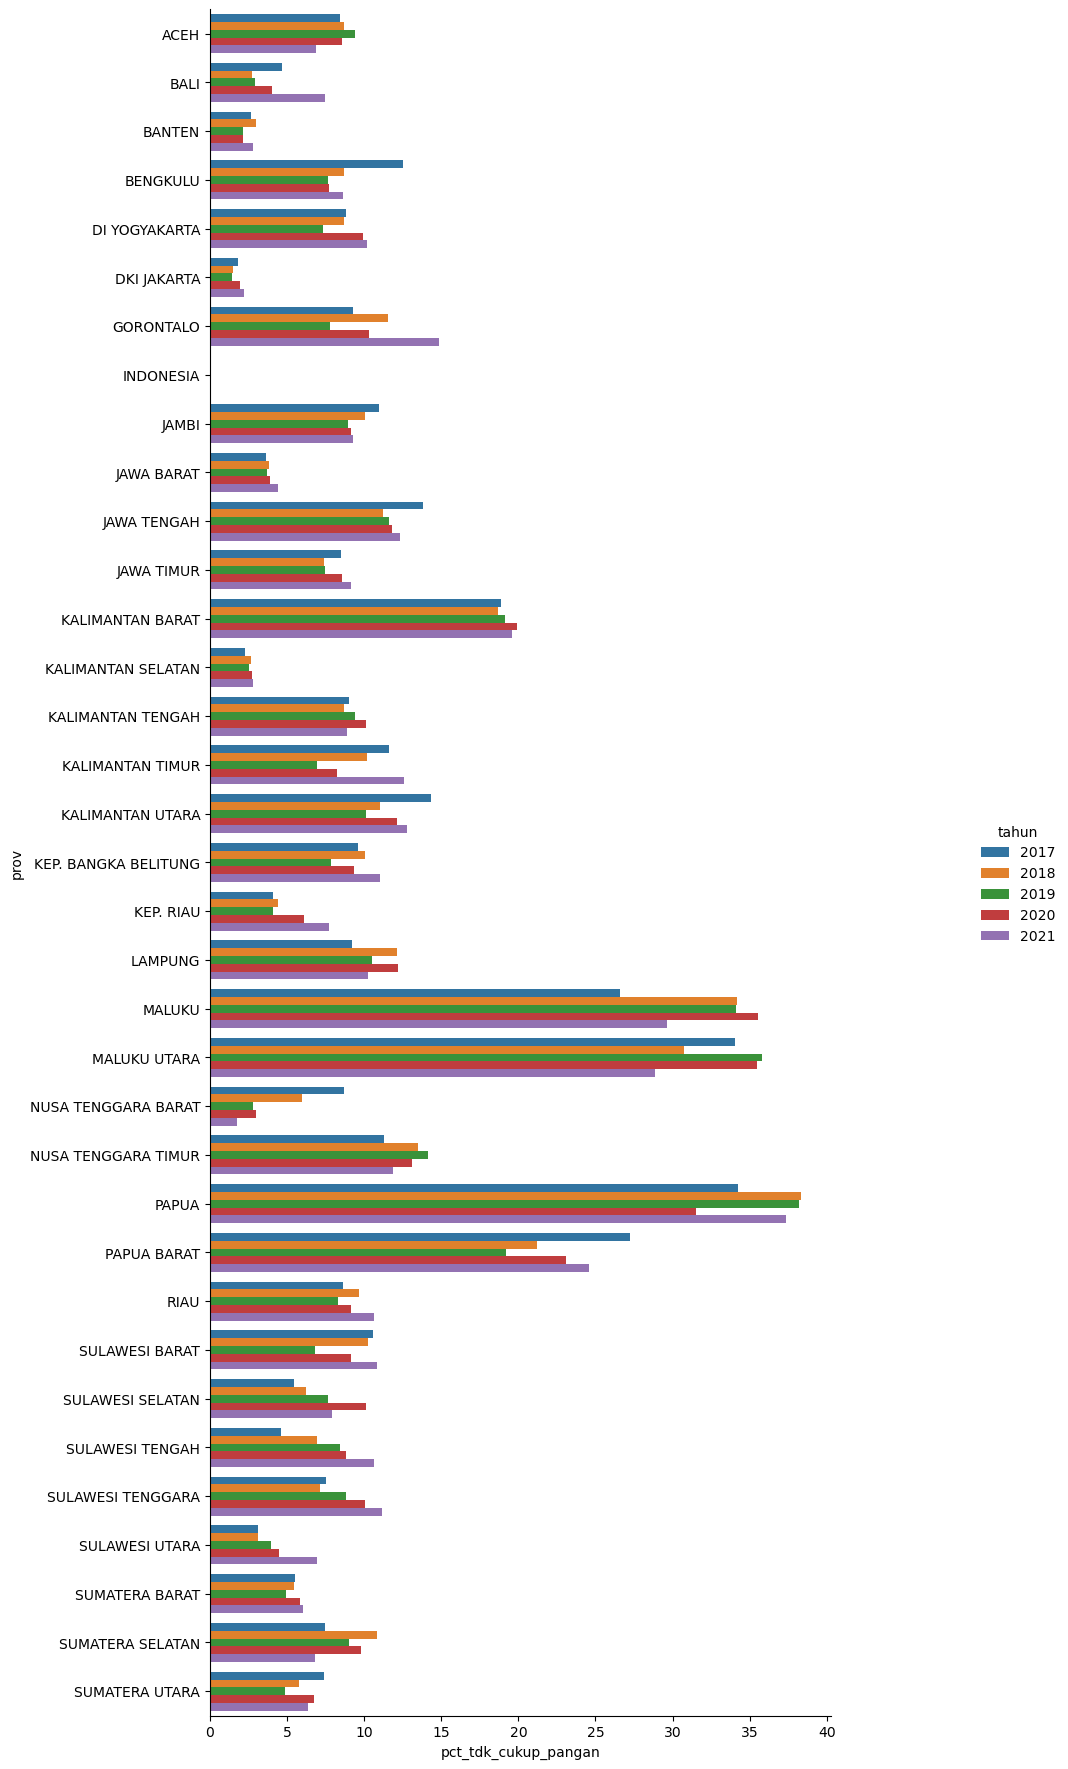

In [9]:
# Visualisasi untuk melihat persentasi ketidakcukupan pangan untuk setiap provinsi untuk setiap tahun
g=sns.catplot(df1, kind='bar', x="pct_tdk_cukup_pangan",y ="prov", hue="tahun")
g.fig.set_size_inches(15,20)

#### Analisis
jika dilihat pertahun, mayoritas provinsi memiliki persentase yang tidak terlalu jauh di setiap tahunnya. Salah satu provinsi yang terlihat perbedaan jauh, yaitu provinsi NTB.

### Dataset melek_huruf_diatas15

In [10]:
df2 = pd.read_csv("C:\\Users\\Byebay\\data mining\\Klasifikasi\\UAS\\dataset\\melek_huruf_diatas15.csv")
df2.head()

,prov,tahun,melek_huruf_diatas15
0,ACEH,2022,98.25
1,SUMATERA UTARA,2022,99.11
2,SUMATERA BARAT,2022,99.29
3,RIAU,2022,99.18
4,JAMBI,2022,98.1


saya memilih dataset melek_huruf_diatas15 karena salah satu dari dimensi PMI adalah pengetahuan, oleh karena itu dengan dataset ini saya ingin mengetahui bagaimana kondisi penduduk yang bisa membaca di atas 15 tahun di setiap provinsi

In [11]:
# Melihat informasi dataframe
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315 entries, 0 to 314
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   prov                  315 non-null    object
 1   tahun                 315 non-null    int64 
 2   melek_huruf_diatas15  315 non-null    object
dtypes: int64(1), object(2)
memory usage: 7.5+ KB


In [12]:
# Melihat data null untuk setiap atribut
df2.isna().sum()

prov                    0
tahun                   0
melek_huruf_diatas15    0
dtype: int64

In [13]:
# Melihat unique data untuk atribut tahun
df2.tahun.value_counts()

2022    35
2021    35
2020    35
2019    35
2018    35
2017    35
2016    35
2015    35
2014    35
Name: tahun, dtype: int64

In [14]:
# Mengubah datatype prov menjadi kategori
df2['prov'] = df2['prov'].astype('category')

#### Mengubah nilai "-" pada atribut melek_huruf_diatas15 menjadi rata-rata dari provinsi tsb

In [15]:
# PADA index 303, atribut melek_huruf_diatas15 "-"
df2[df2['melek_huruf_diatas15'] == "-"]

,prov,tahun,melek_huruf_diatas15
303,KALIMANTAN UTARA,2014,-


In [16]:
# me replace "-" dengan 0 agar dapat diubah menjadi float
df2['melek_huruf_diatas15'] = df2['melek_huruf_diatas15'].replace(['-'], "0")

In [17]:
df2[df2.melek_huruf_diatas15 == "0"]

,prov,tahun,melek_huruf_diatas15
303,KALIMANTAN UTARA,2014,0


In [18]:
# Mengubah datatype melek_huruf_diatas15 menjadi float
df2['melek_huruf_diatas15'] = df2['melek_huruf_diatas15'].astype('float')

In [19]:
# Mencari mean untuk provinsi Kalimantan Utara dari atribut melek_huruf_diatas15
meanKalut = df2.loc[(df2.prov == "KALIMANTAN UTARA") & (df2.melek_huruf_diatas15 != 0.0)]
meanKalut = meanKalut.melek_huruf_diatas15.mean()
meanKalut

95.95875

In [20]:
# Mengisi value melek_huruf_diatas15 yang 0.0 dengan rata-ratanya
df2['melek_huruf_diatas15'] = df2['melek_huruf_diatas15'].replace([0.0], meanKalut)

In [21]:
df2[df2.index == 303]["melek_huruf_diatas15"]

303    95.95875
Name: melek_huruf_diatas15, dtype: float64

In [22]:
# Drop provinsi Indonesia karena Indonesia itu termasuk ke suatu negara bukan provinsi
ididx = df2[df2['prov'] == "INDONESIA"].index
df2.drop(ididx, axis = 0, inplace=True)

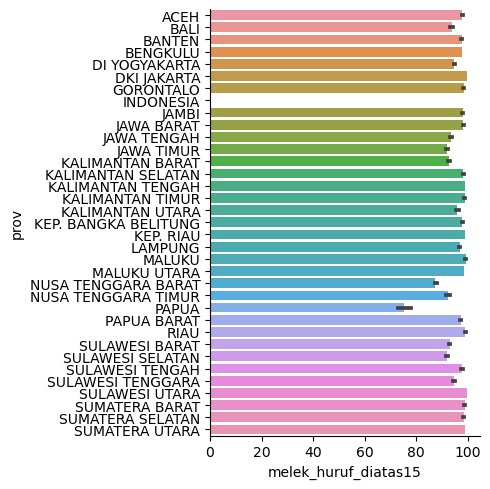

In [23]:
# Visualisasi untuk melihat persentasi melek_huruf_diatas15 untuk setiap provinsi untuk periode 2014-2022
sns.catplot(data=df2, x="melek_huruf_diatas15", y="prov", kind="bar")

#### Analisis
Dapat terlihat pada plot, bahwa persentase penduduk yang melek huruf di atas 15 tahun mayoritas diatas 80% dan hanya 1 provinsi yang persentasenya dibawah 80% yaitu provinsi Papua sekitar 75%. Oleh karena itu, Pendidikan di Indonesia setidaknya untuk hal membaca sudah merata di setiap provinsi

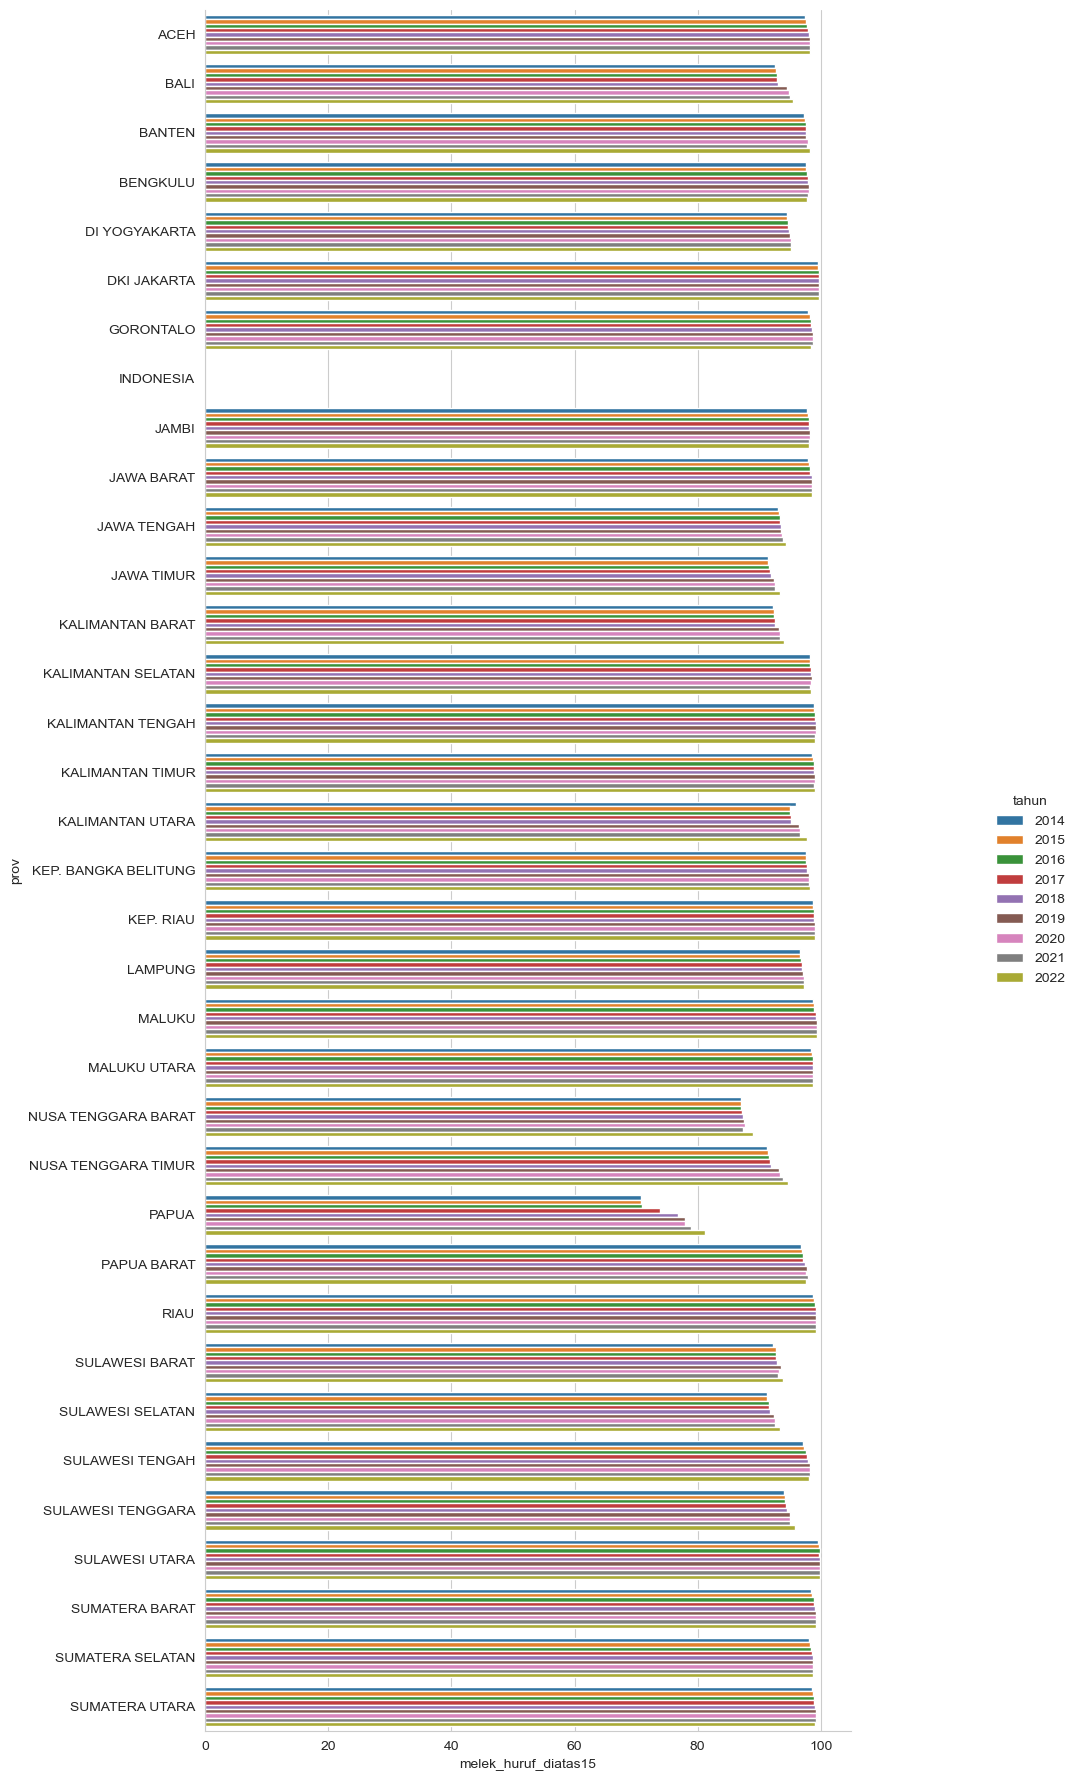

In [82]:
# Visualisasi untuk melihat persentasi melek_huruf_diatas15 untuk setiap provinsi untuk setiap tahun
g=sns.catplot(df2, kind='bar', x="melek_huruf_diatas15",y ="prov", hue="tahun")
g.fig.set_size_inches(15,20)

#### Analisis
Dapat dilihat untuk setiap tahun di setiap provinsi, persentasenya cukup merata, tidak terlihat perbedaan yang signifikan untuk setiap tahunnya di setiap provinsi. Provinsi yang cukup terlihat perbedaan di setiap tahunnya hanya Papua, namun persentase di Papua setiap tahunnya naik sehingga ini merupakan hal yang bagus jika bisa konsisten agar bisa seperti provinsi lainnya, dimana persentasenya ada di 90% nan

### persen_penduduk_trampil_tik

In [25]:
df3 = pd.read_csv("C:\\Users\\Byebay\\data mining\\Klasifikasi\\UAS\\dataset\\persen_penduduk_trampil_tik.csv")
df3.head()

,tahun,persen_penduduk_trampil_tik,prov
0,2021,60.21,ACEH
1,2021,67.41,SUMATERA UTARA
2,2021,68.00,SUMATERA BARAT
3,2021,70.69,RIAU
4,2021,64.47,JAMBI


saya memilih dataset persen_penduduk_trampil_tik karena salah satu dari dimensi PMI adalah pengetahuan, oleh karena itu dengan dataset ini saya ingin mengetahui bagaimana kondisi penduduk terhadap teknolog di setiap provinsinya.

In [26]:
# Melihat informasi dataframe
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   tahun                        245 non-null    int64  
 1   persen_penduduk_trampil_tik  245 non-null    float64
 2   prov                         245 non-null    object 
dtypes: float64(1), int64(1), object(1)
memory usage: 5.9+ KB


In [27]:
# Mengubah datatype prov menjadi kategori
df3['prov'] = df3['prov'].astype('category')

In [28]:
# Melihat null value di setiap atribut
df3.isna().sum()

tahun                          0
persen_penduduk_trampil_tik    0
prov                           0
dtype: int64

In [29]:
# Melihat jumlah unique value untuk atribut tahun
df3.tahun.value_counts()

2021    35
2020    35
2019    35
2018    35
2017    35
2016    35
2015    35
Name: tahun, dtype: int64

In [30]:
# Mengubah datatype persen_penduduk_trampil_tik menjadi float
df3['persen_penduduk_trampil_tik'] = df3['persen_penduduk_trampil_tik'].astype('float')

In [31]:
# Drop provinsi Indonesia karena Indonesia itu termasuk ke suatu negara bukan provinsi
df3.drop(df3[df3['prov'] == "INDONESIA"].index, inplace = True)

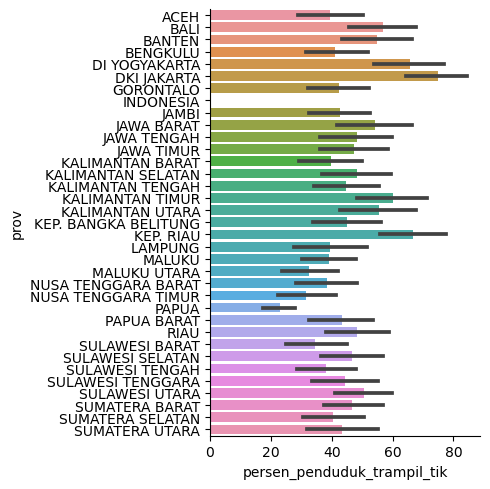

In [32]:
# Visualisasi untuk melihat persentasi ketidakcukupan pangan untuk setiap provinsi untuk periode 2015-2021
sns.catplot(data=df3, x="persen_penduduk_trampil_tik", y="prov", kind="bar")

#### Analisis
Berdasarkan plot, dapat dilihat bahwa persentase penduduk yang terampil TIK terendah ada di provinsi Papua dengan persentase sekitar 22% dan yang tertinggi di provinsi DKI Jakarta yaitu sekitar 75%. Berdasarkan plot juga kita dapat melihat bahwa pengetahuan terkait TIK ini belum merata di setiap provinsi.

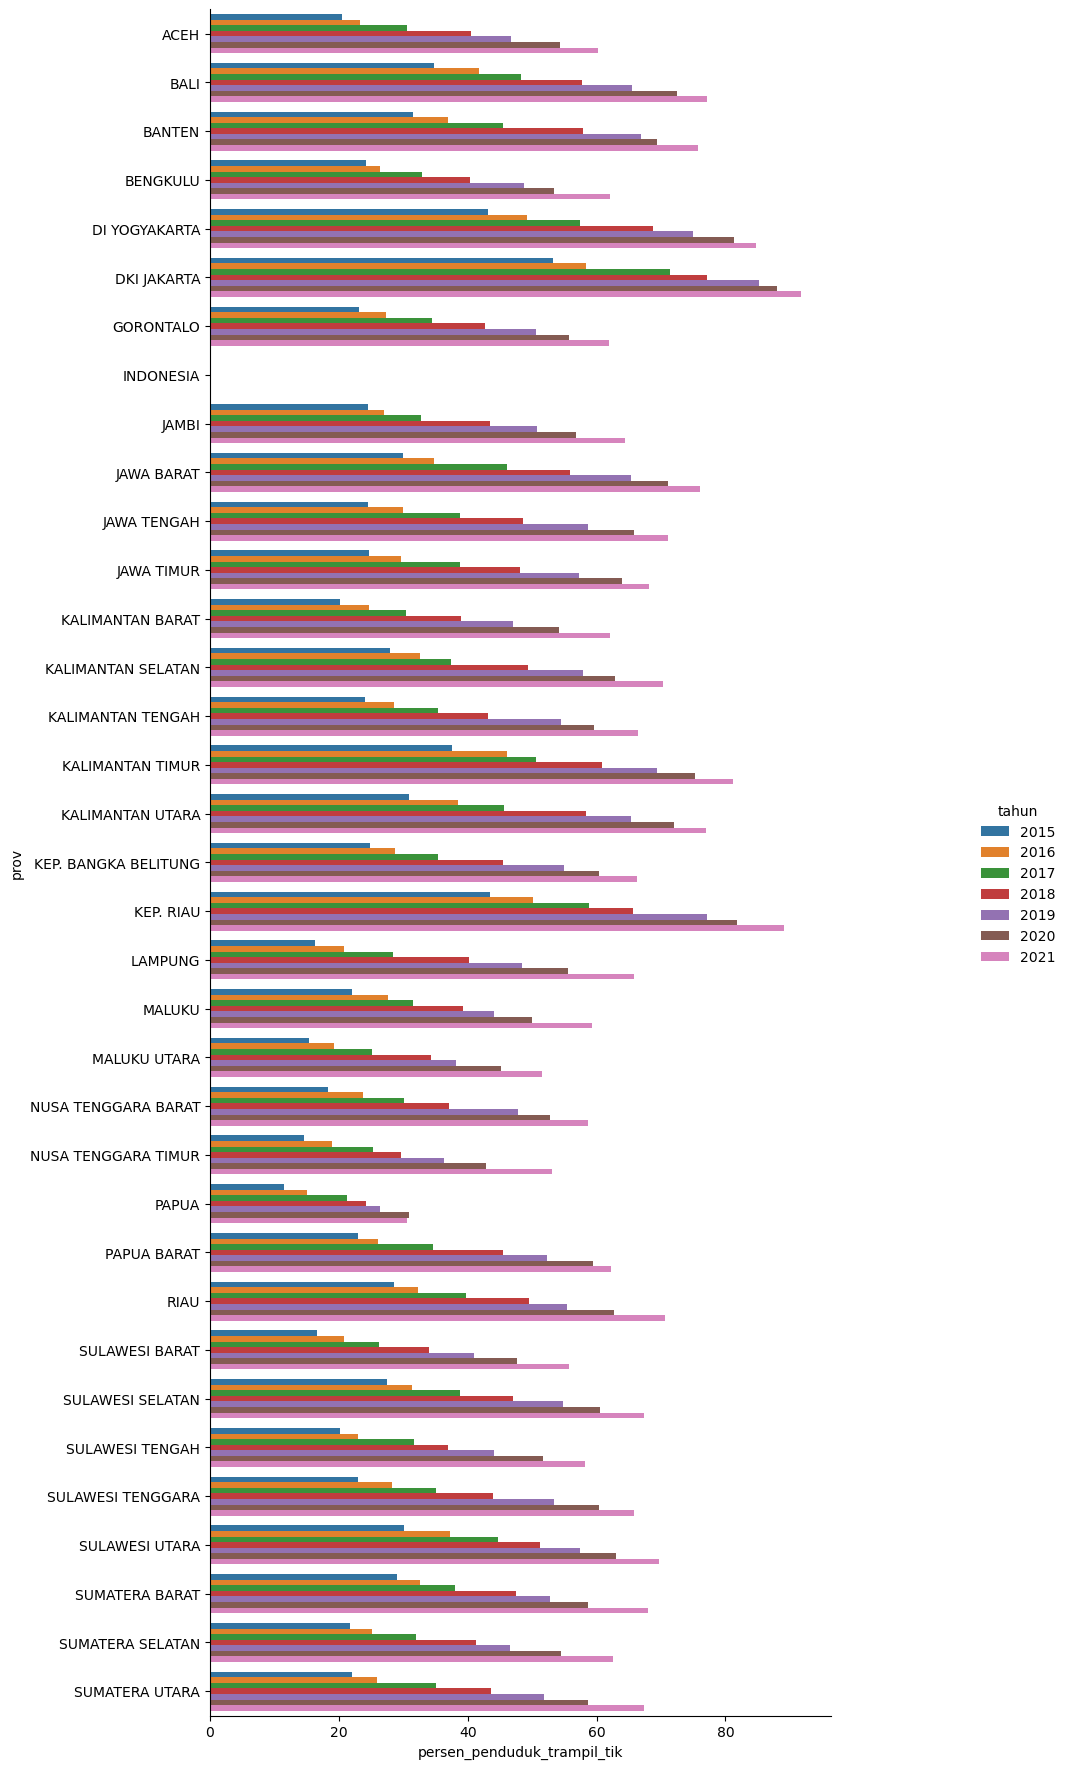

In [33]:
# Visualisasi untuk melihat persentasi ketidakcukupan pangan untuk setiap provinsi untuk setiap tahun
g=sns.catplot(df3, kind='bar', x="persen_penduduk_trampil_tik",y ="prov", hue="tahun")
g.fig.set_size_inches(15,20)

#### Analisis
Jika kita lihat pertahunnya, setiap provinsi memiliki peningkatan yang signifikan dalam hal keterampilan TIK penduduknya. Hal ini merupakan berita bagus, artinya pengetahuan mengenai TIK mulai diketahui oleh banyak penduduk dan jika konsisten maka beberapa tahun kedepan maka mayoritas penduduk Indonesia sudah terbiasa dengan teknologi

### Dataset persen_rumah_menyewa

In [34]:
df4 = pd.read_csv("C:\\Users\\Byebay\\data mining\\Klasifikasi\\UAS\\dataset\\persen_rumah_menyewa.csv")
df4.head()

,tahun,persen_rumah_menyewa,prov
0,2021,6.86,ACEH
1,2021,14.13,SUMATERA UTARA
2,2021,11.37,SUMATERA BARAT
3,2021,11.82,RIAU
4,2021,5.95,JAMBI


saya memilih dataset persen_rumah_menyewa karena salah satu dari dimensi PMI adalah standar hidup layak, oleh karena itu dengan dataset ini saya ingin mengetahui bagaimana kondisi hidup penduduk di setiap provinsi berdasarkan data apakah penduduk yang menyewa

In [35]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tahun                 245 non-null    int64  
 1   persen_rumah_menyewa  245 non-null    float64
 2   prov                  245 non-null    object 
dtypes: float64(1), int64(1), object(1)
memory usage: 5.9+ KB


In [36]:
# Mengubah datatype prov menjadi kategori
df4['prov'] = df4['prov'].astype('category')

In [37]:
df4.isna().sum()

tahun                   0
persen_rumah_menyewa    0
prov                    0
dtype: int64

In [38]:
# Melihat jumlah unique value untuk atribut tahun
df4.tahun.value_counts()

2021    35
2020    35
2019    35
2018    35
2017    35
2016    35
2015    35
Name: tahun, dtype: int64

In [39]:
# Drop provinsi Indonesia karena Indonesia itu termasuk ke suatu negara bukan provinsi
df4.drop(df4[df4['prov'] == "INDONESIA"].index, inplace = True)

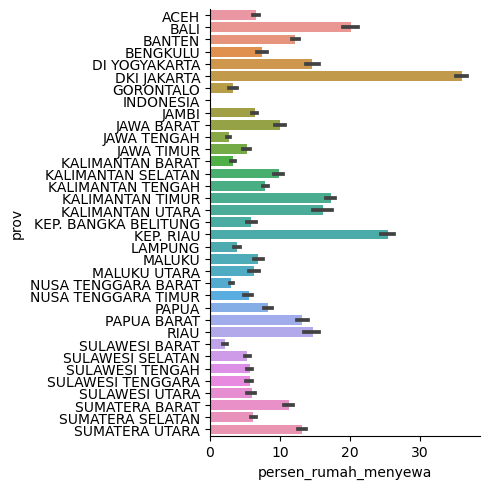

In [40]:
# Visualisasi untuk melihat persen_rumah_menyewa untuk setiap provinsi untuk periode 2015-2021
sns.catplot(data=df4, x="persen_rumah_menyewa", y="prov", kind="bar")

#### Analisis
Berdasarkan plot, dapat dilihat bahwa mayoritas di setiap provinsi memiliki persentase yang rendah dalam hal menyewa. Provinsi yang sangat tinggi persentasenya yaitu DKI Jakarta dengan persentase diatas 30%. Hal ini terjadi dikarenakan banyaknya lapangan pekerjaan disana sehingga penduduk diluar DKI Jakarta harus tinggal dengan menyewa untuk bekerja di DKI Jakarta, bisa juga tinggi karena mahasiswa yang diluar DKI Jakarta berkuliah di Jakarta.

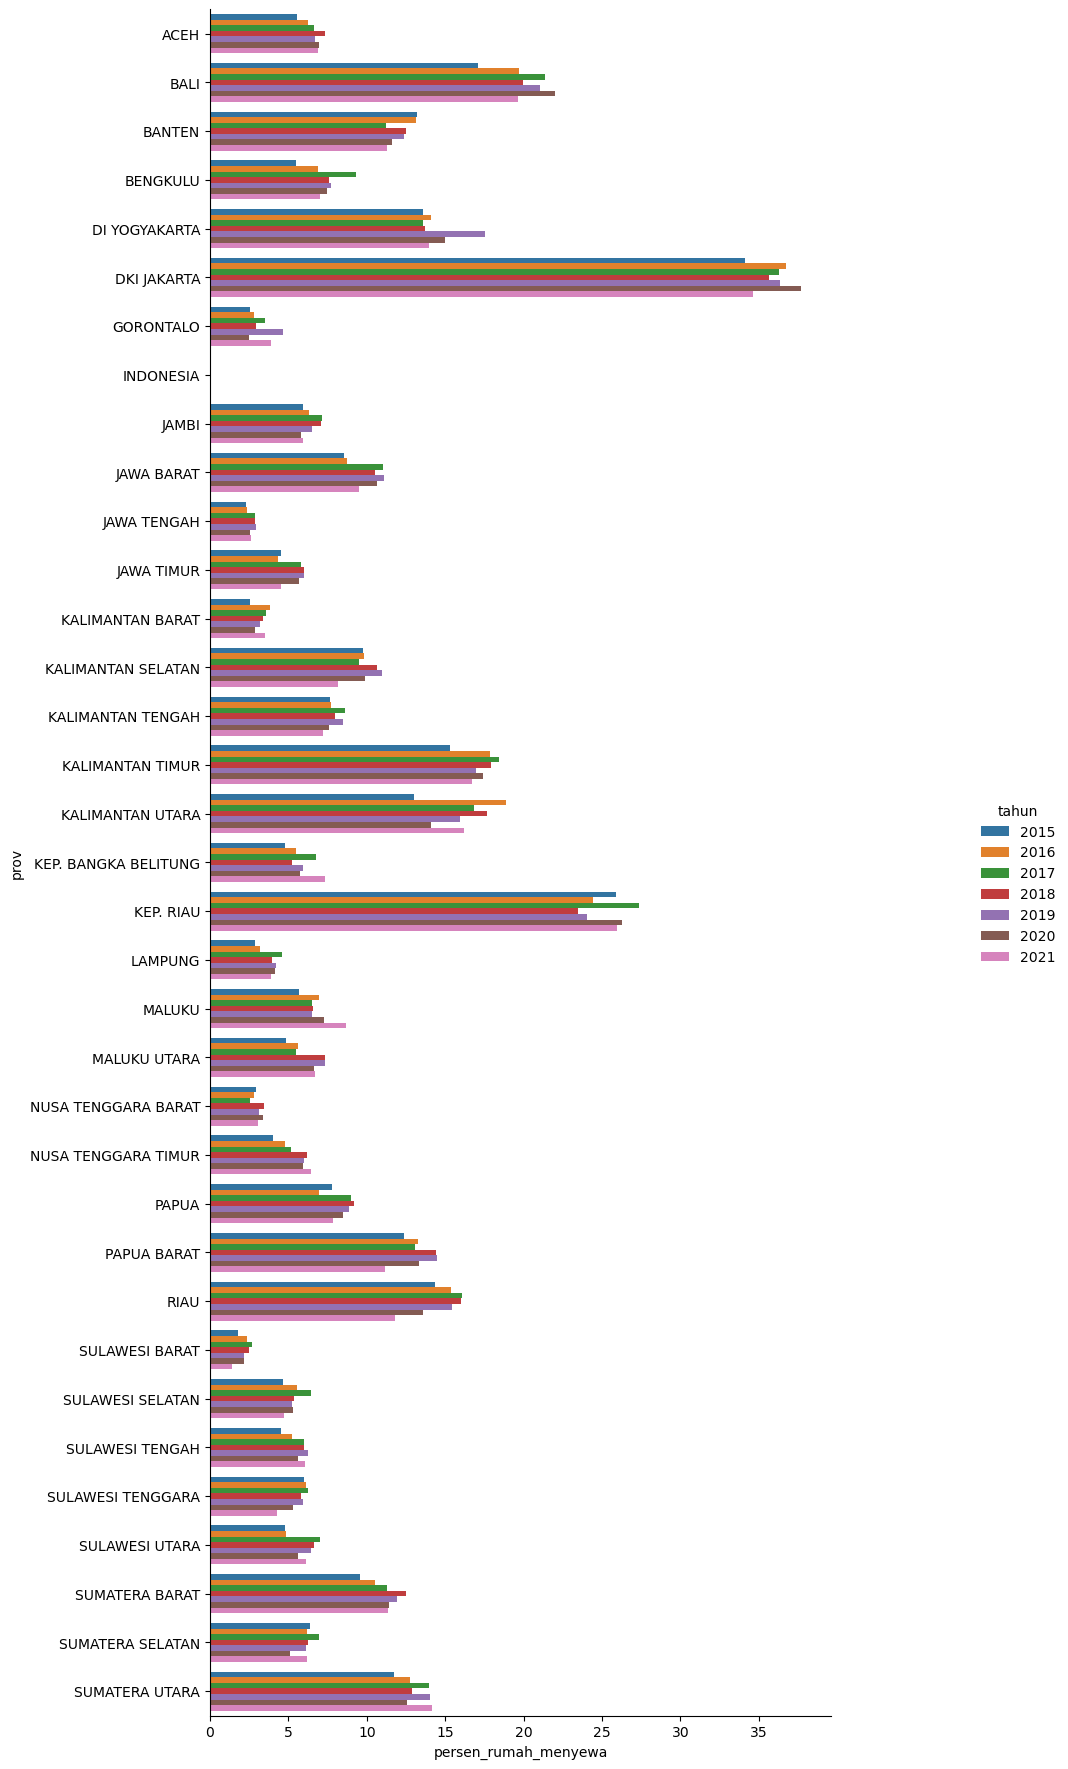

In [41]:
# Visualisasi untuk melihat persentasi persen_rumah_menyewa untuk setiap provinsi untuk setiap tahun
g=sns.catplot(df4, kind='bar', x="persen_rumah_menyewa",y ="prov", hue="tahun")
g.fig.set_size_inches(15,20)

#### Analisis
Dapat dilihat, untuk setiap tahunnya mayoritas provinsi memiliki persentase yang tidak terlalu jauh perbedaannya.

### Dataset PMI

In [42]:
df = pd.read_csv("C:\\Users\\Byebay\\data mining\\Klasifikasi\\UAS\\dataset\\pmi.csv")
df.head()

,prov,tahun,kategori_pmi
0,ACEH,2022,TINGGI
1,SUMATERA UTARA,2022,TINGGI
2,SUMATERA BARAT,2022,TINGGI
3,RIAU,2022,TINGGI
4,JAMBI,2022,TINGGI


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   prov          442 non-null    object
 1   tahun         442 non-null    int64 
 2   kategori_pmi  442 non-null    object
dtypes: int64(1), object(2)
memory usage: 10.5+ KB


In [44]:
# Mengubah datatype prov dan kategori_pmi menjadi kategori
df['prov'] = df['prov'].astype('category')
df['kategori_pmi'] = df['kategori_pmi'].astype('category')

In [45]:
df.kategori_pmi.value_counts()

SEDANG           249
TINGGI           170
SANGAT RENDAH     15
SANGAT TINGGI      8
Name: kategori_pmi, dtype: int64

In [46]:
df.tahun.value_counts()

2022    34
2021    34
2020    34
2019    34
2018    34
2017    34
2016    34
2015    34
2014    34
2013    34
2012    34
2011    34
2010    34
Name: tahun, dtype: int64

In [47]:
# Merge dataset
df = pd.merge(df, df1, how = 'left', on = ['tahun', 'prov'])

In [48]:
df = pd.merge(df, df2, how = 'left', on = ['tahun', 'prov'])

In [49]:
df = pd.merge(df, df3, how = 'left', on = ['tahun', 'prov'])

In [50]:
df = pd.merge(df, df4, how = 'left', on = ['tahun', 'prov'])

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 442 entries, 0 to 441
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   prov                         442 non-null    object  
 1   tahun                        442 non-null    int64   
 2   kategori_pmi                 442 non-null    category
 3   pct_tdk_cukup_pangan         170 non-null    float64 
 4   melek_huruf_diatas15         306 non-null    float64 
 5   persen_penduduk_trampil_tik  238 non-null    float64 
 6   persen_rumah_menyewa         238 non-null    float64 
dtypes: category(1), float64(4), int64(1), object(1)
memory usage: 24.8+ KB


In [52]:
# melihat data null setelah di merge
df.isna().sum()

prov                             0
tahun                            0
kategori_pmi                     0
pct_tdk_cukup_pangan           272
melek_huruf_diatas15           136
persen_penduduk_trampil_tik    204
persen_rumah_menyewa           204
dtype: int64

### Penanganan data null atribut pct_tdk_cukup_pangan

In [53]:
# melihat data null pada atribut pct_tdk_cukup_pangan berdasarkan rata-rata provinsinya
df.loc[df.pct_tdk_cukup_pangan.isna()].prov.value_counts()

ACEH                    8
SULAWESI TENGAH         8
KALIMANTAN BARAT        8
KALIMANTAN TENGAH       8
KALIMANTAN SELATAN      8
KALIMANTAN TIMUR        8
KALIMANTAN UTARA        8
SULAWESI UTARA          8
SULAWESI SELATAN        8
SUMATERA UTARA          8
SULAWESI TENGGARA       8
GORONTALO               8
SULAWESI BARAT          8
MALUKU                  8
MALUKU UTARA            8
PAPUA BARAT             8
NUSA TENGGARA TIMUR     8
NUSA TENGGARA BARAT     8
BALI                    8
BANTEN                  8
JAWA TIMUR              8
DI YOGYAKARTA           8
JAWA TENGAH             8
JAWA BARAT              8
DKI JAKARTA             8
KEP. RIAU               8
KEP. BANGKA BELITUNG    8
LAMPUNG                 8
BENGKULU                8
SUMATERA SELATAN        8
JAMBI                   8
RIAU                    8
SUMATERA BARAT          8
PAPUA                   8
Name: prov, dtype: int64

In [54]:
# Mengambil list provinsinya saja untuk perulangan
list_provinsi = df.loc[(df.tahun == 2022)].prov

In [55]:
# perulangan untuk mencari rata-rata atribut pct_tdk_cukup_pangan untuk setiap provinsi dan mengisi data null pada provinsi tsb
for provinsi in list_provinsi:
    provMean = round(df.loc[(df.prov == provinsi) & (df.pct_tdk_cukup_pangan.isna() == False)].pct_tdk_cukup_pangan.mean(), 2)
    df.loc[(df.prov == provinsi) & (df.pct_tdk_cukup_pangan.isna()), 'pct_tdk_cukup_pangan'] = provMean

### Penanganan data null atribut melek_huruf_diatas15

In [56]:
# melihat data null pada atribut melek_huruf_diatas15 berdasarkan rata-rata provinsinya
df.loc[df.melek_huruf_diatas15.isna()].prov.value_counts()

ACEH                    4
SULAWESI TENGAH         4
KALIMANTAN BARAT        4
KALIMANTAN TENGAH       4
KALIMANTAN SELATAN      4
KALIMANTAN TIMUR        4
KALIMANTAN UTARA        4
SULAWESI UTARA          4
SULAWESI SELATAN        4
SUMATERA UTARA          4
SULAWESI TENGGARA       4
GORONTALO               4
SULAWESI BARAT          4
MALUKU                  4
MALUKU UTARA            4
PAPUA BARAT             4
NUSA TENGGARA TIMUR     4
NUSA TENGGARA BARAT     4
BALI                    4
BANTEN                  4
JAWA TIMUR              4
DI YOGYAKARTA           4
JAWA TENGAH             4
JAWA BARAT              4
DKI JAKARTA             4
KEP. RIAU               4
KEP. BANGKA BELITUNG    4
LAMPUNG                 4
BENGKULU                4
SUMATERA SELATAN        4
JAMBI                   4
RIAU                    4
SUMATERA BARAT          4
PAPUA                   4
Name: prov, dtype: int64

In [57]:
# perulangan untuk mencari rata-rata atribut melek_huruf_diatas15 untuk setiap provinsi dan mengisi data null pada provinsi tsb
for provinsi in list_provinsi:
    provMean = round(df.loc[(df.prov == provinsi) & (df.melek_huruf_diatas15.isna() == False)].melek_huruf_diatas15.mean(), 2)
    df.loc[(df.prov == provinsi) & (df.melek_huruf_diatas15.isna()), 'melek_huruf_diatas15'] = provMean

### Penanganan data null atribut persen_penduduk_trampil_tik

In [58]:
# melihat data null pada atribut persen_penduduk_trampil_tik berdasarkan rata-rata provinsinya
df.loc[df.persen_penduduk_trampil_tik.isna()].prov.value_counts()

ACEH                    6
SULAWESI TENGAH         6
KALIMANTAN BARAT        6
KALIMANTAN TENGAH       6
KALIMANTAN SELATAN      6
KALIMANTAN TIMUR        6
KALIMANTAN UTARA        6
SULAWESI UTARA          6
SULAWESI SELATAN        6
SUMATERA UTARA          6
SULAWESI TENGGARA       6
GORONTALO               6
SULAWESI BARAT          6
MALUKU                  6
MALUKU UTARA            6
PAPUA BARAT             6
NUSA TENGGARA TIMUR     6
NUSA TENGGARA BARAT     6
BALI                    6
BANTEN                  6
JAWA TIMUR              6
DI YOGYAKARTA           6
JAWA TENGAH             6
JAWA BARAT              6
DKI JAKARTA             6
KEP. RIAU               6
KEP. BANGKA BELITUNG    6
LAMPUNG                 6
BENGKULU                6
SUMATERA SELATAN        6
JAMBI                   6
RIAU                    6
SUMATERA BARAT          6
PAPUA                   6
Name: prov, dtype: int64

In [59]:
# perulangan untuk mencari rata-rata atribut persen_penduduk_trampil_tik untuk setiap provinsi dan mengisi data null pada provinsi tsb
for provinsi in list_provinsi:
    provMean = round(df.loc[(df.prov == provinsi) & (df.persen_penduduk_trampil_tik.isna() == False)].persen_penduduk_trampil_tik.mean(), 2)
    df.loc[(df.prov == provinsi) & (df.persen_penduduk_trampil_tik.isna()), 'persen_penduduk_trampil_tik'] = provMean

### Penanganan data null atribut persen_rumah_menyewa

In [60]:
# melihat data null pada atribut persen_rumah_menyewa berdasarkan rata-rata provinsinya
df.loc[df.persen_rumah_menyewa.isna()].prov.value_counts()

ACEH                    6
SULAWESI TENGAH         6
KALIMANTAN BARAT        6
KALIMANTAN TENGAH       6
KALIMANTAN SELATAN      6
KALIMANTAN TIMUR        6
KALIMANTAN UTARA        6
SULAWESI UTARA          6
SULAWESI SELATAN        6
SUMATERA UTARA          6
SULAWESI TENGGARA       6
GORONTALO               6
SULAWESI BARAT          6
MALUKU                  6
MALUKU UTARA            6
PAPUA BARAT             6
NUSA TENGGARA TIMUR     6
NUSA TENGGARA BARAT     6
BALI                    6
BANTEN                  6
JAWA TIMUR              6
DI YOGYAKARTA           6
JAWA TENGAH             6
JAWA BARAT              6
DKI JAKARTA             6
KEP. RIAU               6
KEP. BANGKA BELITUNG    6
LAMPUNG                 6
BENGKULU                6
SUMATERA SELATAN        6
JAMBI                   6
RIAU                    6
SUMATERA BARAT          6
PAPUA                   6
Name: prov, dtype: int64

In [61]:
# perulangan untuk mencari rata-rata atribut persen_rumah_menyewa untuk setiap provinsi dan mengisi data null pada provinsi tsb
for provinsi in list_provinsi:
    provMean = round(df.loc[(df.prov == provinsi) & (df.persen_rumah_menyewa.isna() == False)].persen_rumah_menyewa.mean(), 2)
    df.loc[(df.prov == provinsi) & (df.persen_rumah_menyewa.isna()), 'persen_rumah_menyewa'] = provMean

In [62]:
df.head()

,prov,tahun,kategori_pmi,pct_tdk_cukup_pangan,melek_huruf_diatas15,persen_penduduk_trampil_tik,persen_rumah_menyewa
0,ACEH,2022,TINGGI,8.39,98.25,39.44,6.60
1,SUMATERA UTARA,2022,TINGGI,6.21,99.11,43.52,13.15
2,SUMATERA BARAT,2022,TINGGI,5.55,99.29,46.66,11.24
3,RIAU,2022,TINGGI,9.27,99.18,48.40,14.66
4,JAMBI,2022,TINGGI,9.66,98.10,42.85,6.38


In [63]:
# DROP ATRIBUT TAHUN DAN PROVINSI
df.drop(['tahun', 'prov'], axis=1, inplace=True)

<AxesSubplot: xlabel='kategori_pmi', ylabel='count'>

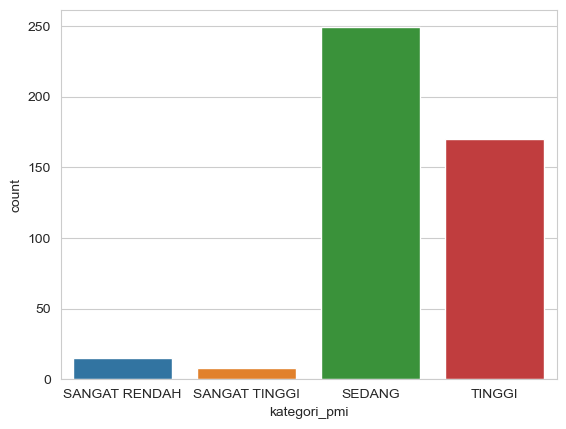

In [64]:
# Visualisasi kelas target
sns.set_style('whitegrid')
sns.countplot(x = "kategori_pmi", data = df)

#### analisis
kategori pmi yang sedang dan tinggi memiliki jumlah yang banyak jika dibandingkan yang sangat rendah dan sangat tinggi. Hal ini akan menyebabkan perbedaan data yang signifikan jika kita melihat persebaran data kategori pmi terhadap atribut lainnya.

### Visualisasi kolom yang tipe data numerik terhadap target (kategori_pmi)

### atribut pct_tdk_cukup_pangan terhadap kategori_pmi

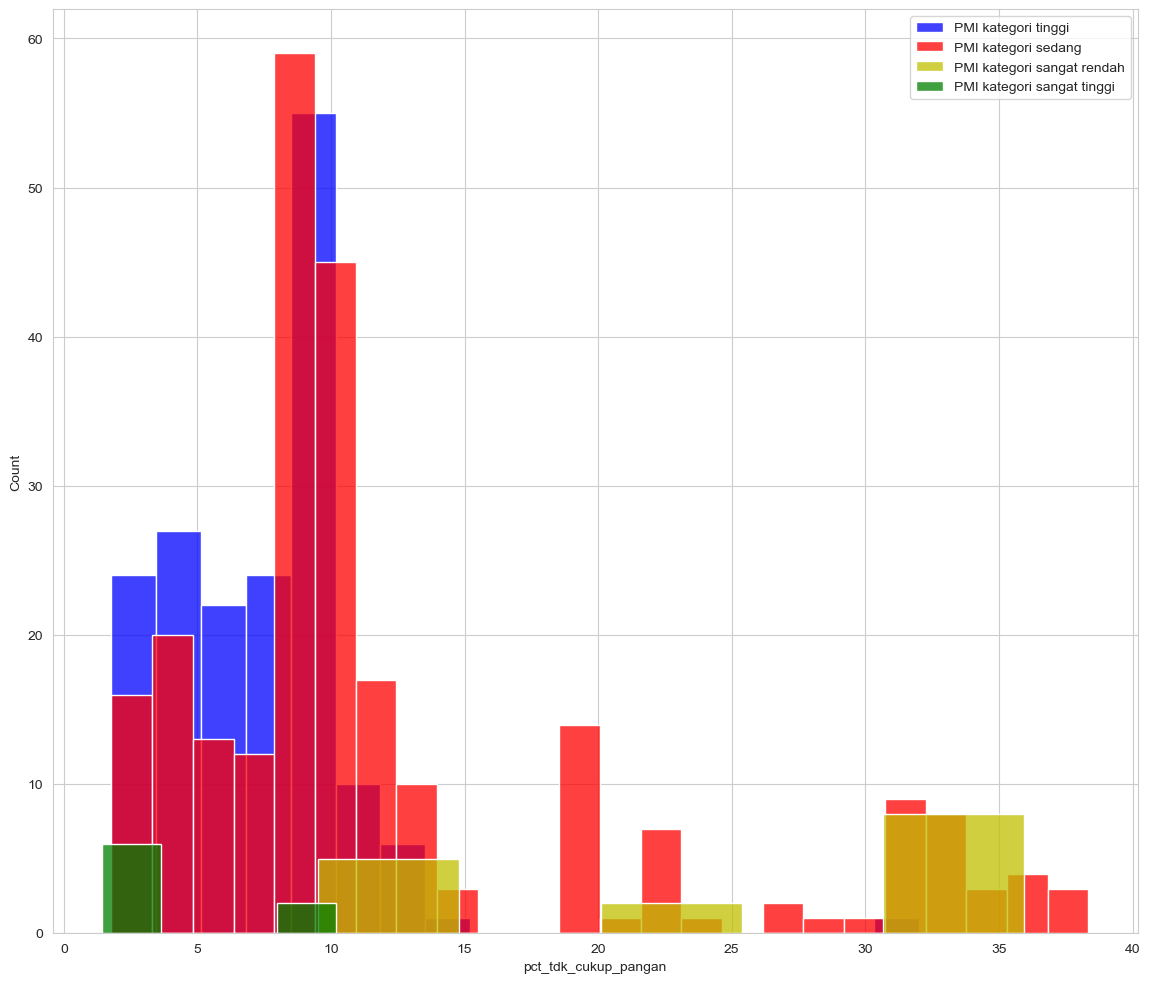

In [65]:
plt.figure(figsize=(14, 12))
sns.histplot(df.pct_tdk_cukup_pangan[df.kategori_pmi == "TINGGI"],color = "b", label="PMI kategori tinggi")
sns.histplot(df.pct_tdk_cukup_pangan[df.kategori_pmi == "SEDANG"],color = "r", label="PMI kategori sedang")
sns.histplot(df.pct_tdk_cukup_pangan[df.kategori_pmi == "SANGAT RENDAH"],color = "y", label="PMI kategori sangat rendah")
sns.histplot(df.pct_tdk_cukup_pangan[df.kategori_pmi == "SANGAT TINGGI"],color = "g", label="PMI kategori sangat tinggi")
plt.legend();

#### Analisis 
- kategori pmi tinggi dan sangat tinggi memiliki persentase kecukupan pangan yang sangat rendah yaitu ada di kisaran 2-14%
- kategori pmi sedang memiliki persentase kecukupan pangan yang beragam, ada yang rendah di kisaran 2-15%, ada yang pertengahan di kisaran 19-25%, dan ada yang tinggi yaitu di kisaran 30-38%
- kategori pmi yang sangat rendah juga memiliki persentase kecukupan pangan yang beragam, ada yang di kisaran 10-15%, 20-25%, dan paling banyak di kisaran 30-36%. 

### atribut melek_huruf_diatas15 terhadap kategori_pmi

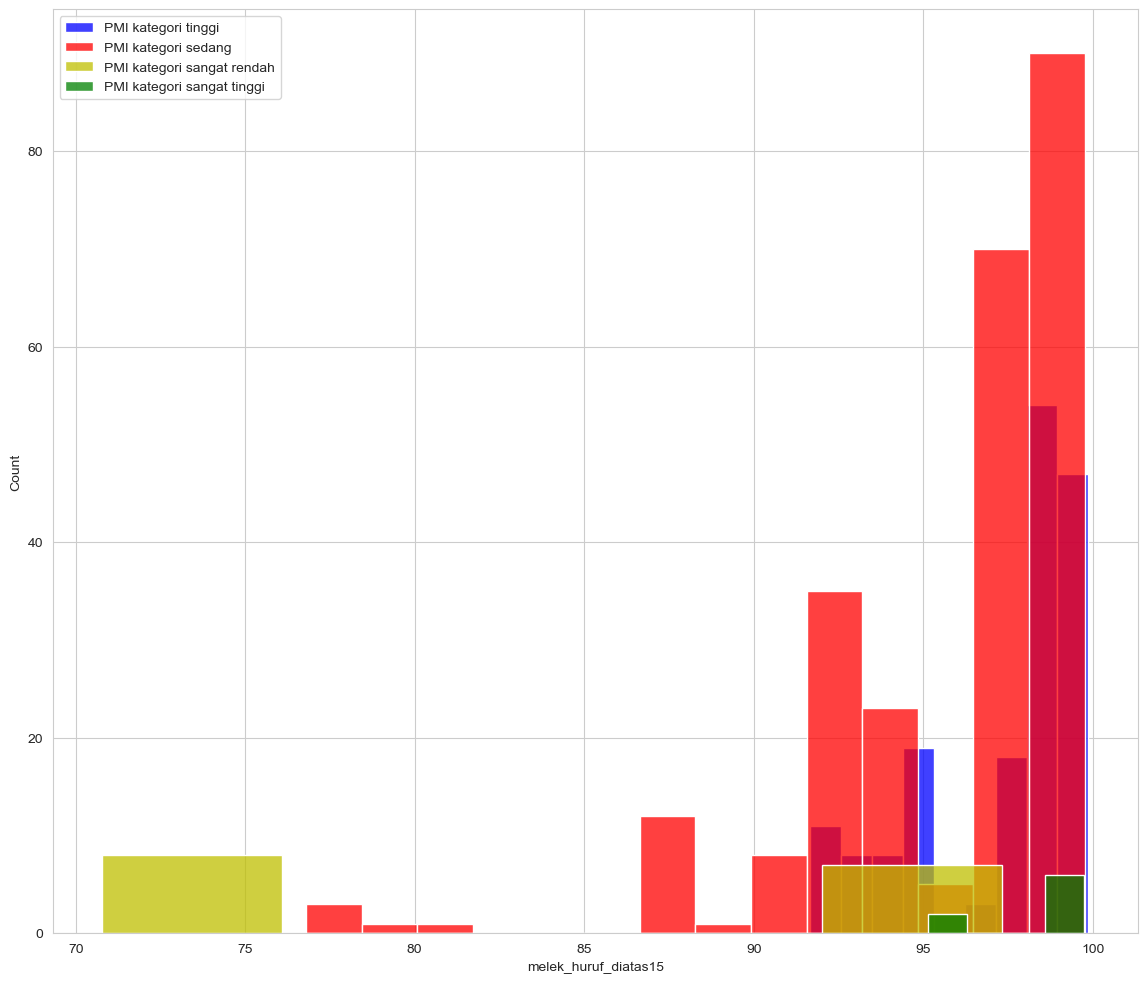

In [66]:
plt.figure(figsize=(14, 12))
sns.histplot(df.melek_huruf_diatas15[df.kategori_pmi == "TINGGI"],color = "b", label="PMI kategori tinggi")
sns.histplot(df.melek_huruf_diatas15[df.kategori_pmi == "SEDANG"],color = "r", label="PMI kategori sedang")
sns.histplot(df.melek_huruf_diatas15[df.kategori_pmi == "SANGAT RENDAH"],color = "y", label="PMI kategori sangat rendah")
sns.histplot(df.melek_huruf_diatas15[df.kategori_pmi == "SANGAT TINGGI"],color = "g", label="PMI kategori sangat tinggi")
plt.legend();

#### Analisis
- kategori PMI yang sedang, tinggi, dan sangat tinggi kebanyakan memiliki persentase melek_huruf_diatas15 yang tinggi yaitu ada di kisaran 87-99%
- kategori PMI yang sangat rendah, ada yang persentasenya lumayan tinggi, di kisaran 92-98% namun ada juga yg sangat rendah, yaitu di kisaran 71-76%

### atribut persen_penduduk_trampil_tik terhadap kategori_pmi

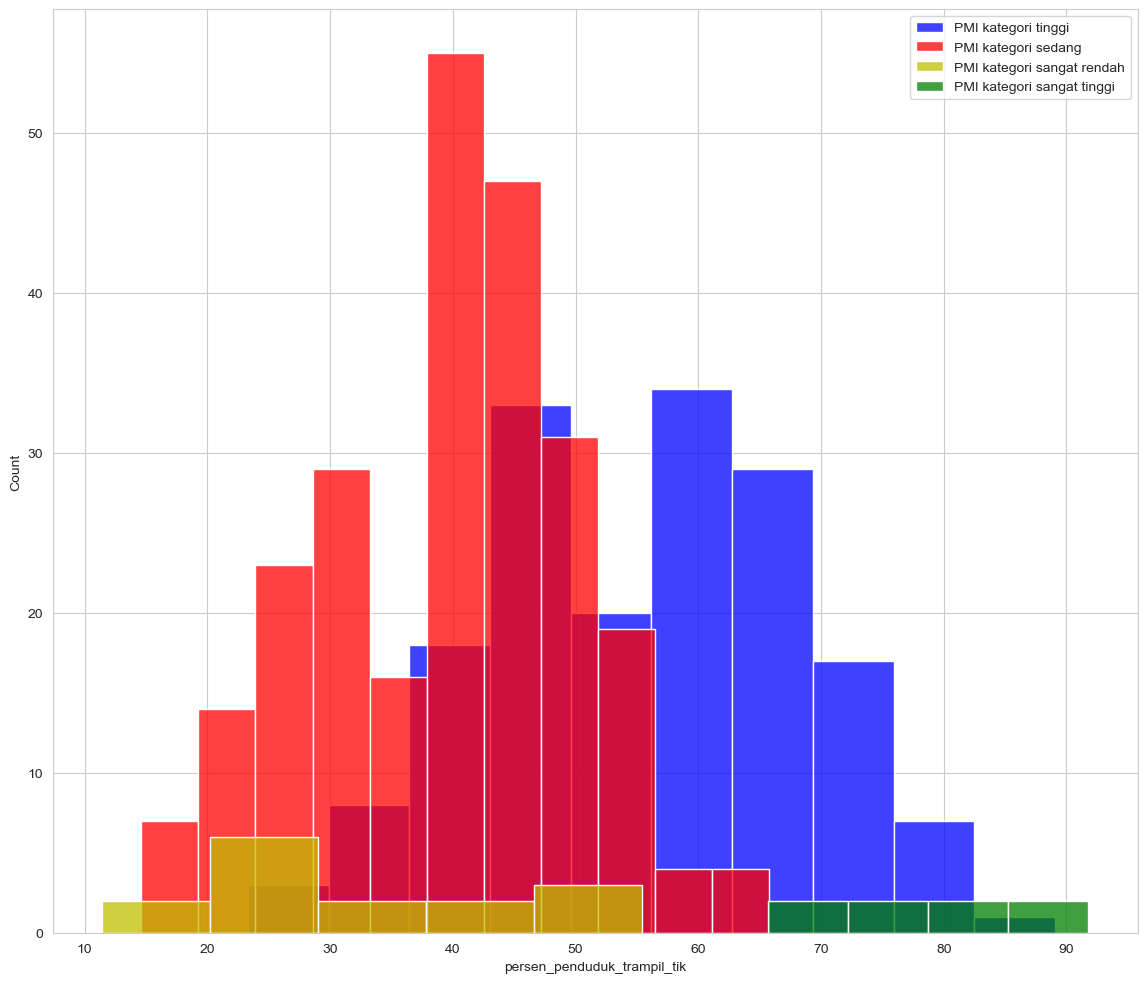

In [67]:
plt.figure(figsize=(14, 12))
sns.histplot(df.persen_penduduk_trampil_tik[df.kategori_pmi == "TINGGI"],color = "b", label="PMI kategori tinggi")
sns.histplot(df.persen_penduduk_trampil_tik[df.kategori_pmi == "SEDANG"],color = "r", label="PMI kategori sedang")
sns.histplot(df.persen_penduduk_trampil_tik[df.kategori_pmi == "SANGAT RENDAH"],color = "y", label="PMI kategori sangat rendah")
sns.histplot(df.persen_penduduk_trampil_tik[df.kategori_pmi == "SANGAT TINGGI"],color = "g", label="PMI kategori sangat tinggi")
plt.legend();

#### Analisis
- kategori PMI yang sangat tinggi memiliki persentase yang sangat tinggi juga yaitu berkisar 65-91%
- kategori PMI yang sedang dan tinggi memiliki persentase yang beragam dari 15-89%
- kategori PMI yang sangat rendah juga beragam dikisaran 11-55%

### atribut persen_rumah_menyewa terhadap kategori_pmi

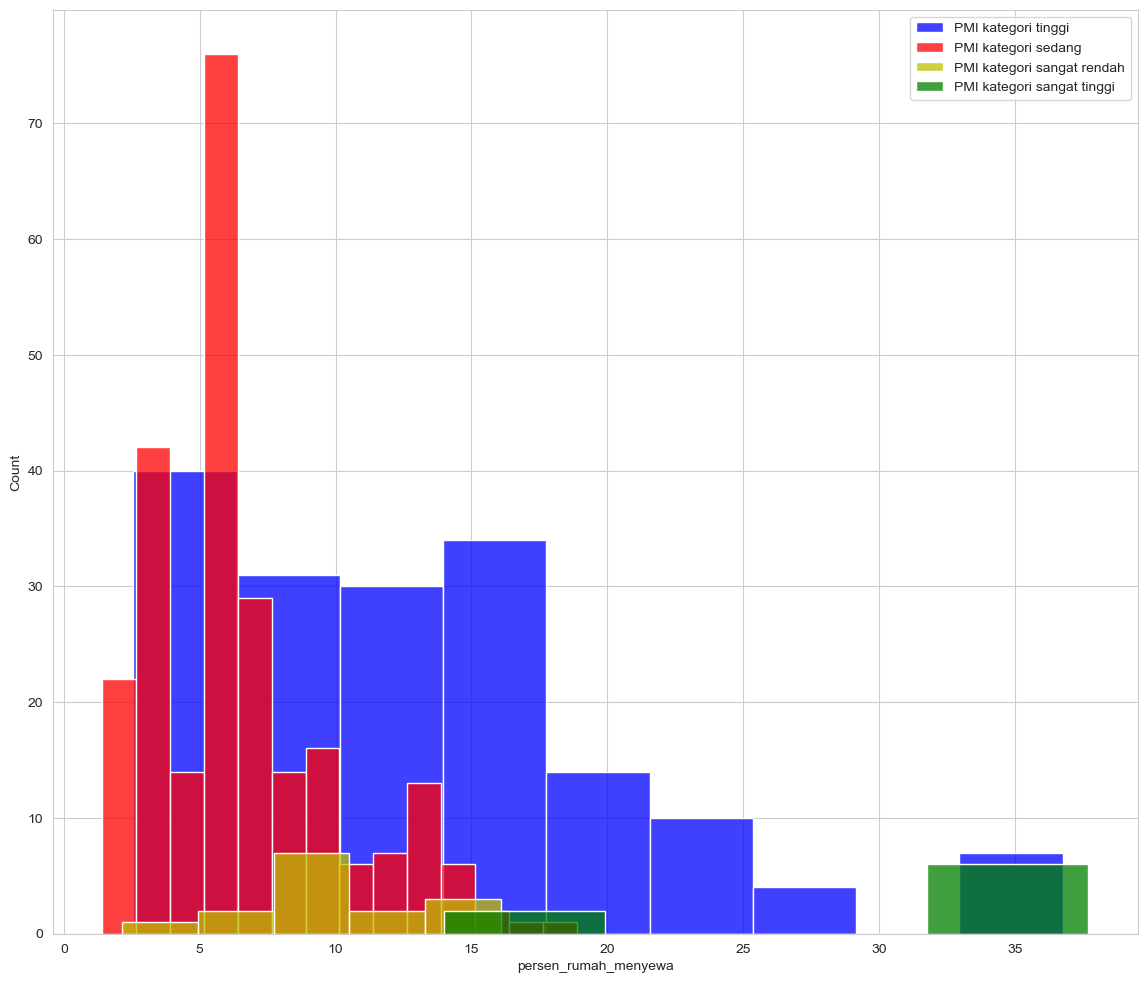

In [68]:
plt.figure(figsize=(14, 12))
sns.histplot(df.persen_rumah_menyewa[df.kategori_pmi == "TINGGI"],color = "b", label="PMI kategori tinggi")
sns.histplot(df.persen_rumah_menyewa[df.kategori_pmi == "SEDANG"],color = "r", label="PMI kategori sedang")
sns.histplot(df.persen_rumah_menyewa[df.kategori_pmi == "SANGAT RENDAH"],color = "y", label="PMI kategori sangat rendah")
sns.histplot(df.persen_rumah_menyewa[df.kategori_pmi == "SANGAT TINGGI"],color = "g", label="PMI kategori sangat tinggi")
plt.legend();

#### Analisis
- kategori PMI yang sangat rendah dan sedang memiliki persentase rumah menyewa yang rendah yaitu berkisar 2-19%
- kategori PMI yang tinggi memiliki persentase yang beragam, ada yang rendah dan paling banyak yaitu 3-6%, dan sisanya ada dikisaran 6-29%. Namun ada yang menarik juga dari kategori PMI yang tinggi dan sangat tinggi, yaitu ada data yang persentasenya dikisaran 32-38%, dimana persentase tsb adalah yang tertinggi pada data ini.

In [69]:
# Melihat deskripsi dataframe yang bertipe numerik
df.describe().T

,count,mean,std,min,25%,50%,75%,max
pct_tdk_cukup_pangan,442.0,10.813778,8.340767,1.430000,5.550000,8.99,11.0500,38.35
melek_huruf_diatas15,442.0,96.014907,4.638366,70.780000,93.977500,97.88,98.7775,99.87
persen_penduduk_trampil_tik,442.0,46.111029,14.839827,11.426463,37.242123,44.54,55.4000,91.79
persen_rumah_menyewa,442.0,9.610000,7.044651,1.410000,5.387500,6.88,13.0800,37.71


<AxesSubplot: >

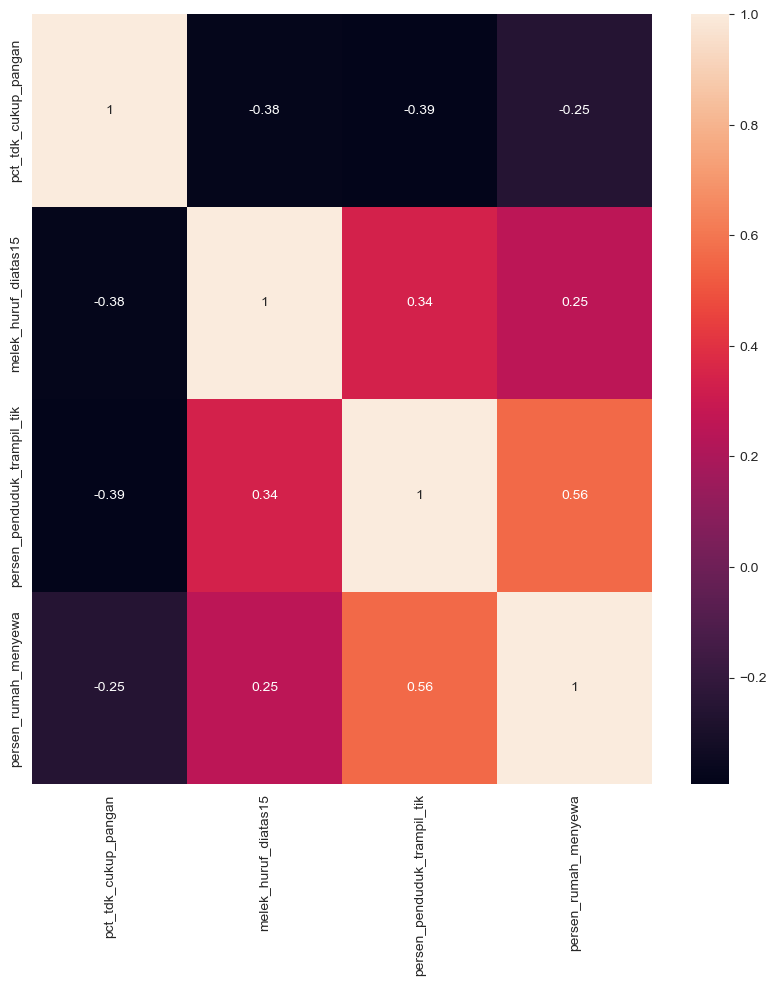

In [70]:
# Melihat korelasi antar atribut yang bertipe numerik
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, ax=ax)

#### analisis
- atribut pct_tdk_cukup_pangan memiliki korelasi negatif dengan atribut numerik lainnya
- atribut melek_huruf_diatas15 memiliki korelasi positif yang lumayan tinggi dengan atribut persen_penduduk_terampil_tik dan persen_rumah_menyewa
- atribut persen_penduduk_terampil_tik memiliki korelasi yang tinggi dengan atribut persen_rumah_menyewa

## Klasifikasi

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 442 entries, 0 to 441
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   kategori_pmi                 442 non-null    category
 1   pct_tdk_cukup_pangan         442 non-null    float64 
 2   melek_huruf_diatas15         442 non-null    float64 
 3   persen_penduduk_trampil_tik  442 non-null    float64 
 4   persen_rumah_menyewa         442 non-null    float64 
dtypes: category(1), float64(4)
memory usage: 17.9 KB


In [73]:
# proses kelas target yaitu kategori_pmi
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df.kategori_pmi)
Y = le.transform(df.kategori_pmi) 

In [74]:
# MELIHAT KELAS TARGET
list(le.classes_)

['SANGAT RENDAH', 'SANGAT TINGGI', 'SEDANG', 'TINGGI']

In [75]:
# DROP KELAS TARGET
X = df.drop(["kategori_pmi"],axis=1)

In [76]:
# SPLIT DATA
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=None)

In [79]:
# RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
clf = RandomForestClassifier(n_estimators=100, random_state=123)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
acc = accuracy_score(Y_test, Y_pred)
print("Akurasi {}".format(acc))
print(classification_report(Y_test, Y_pred))

Akurasi 0.8426966292134831
              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       1.00      0.50      0.67         2
           2       0.79      1.00      0.88        50
           3       0.95      0.62      0.75        32

    accuracy                           0.84        89
   macro avg       0.94      0.73      0.80        89
weighted avg       0.87      0.84      0.83        89



In [80]:
# MELIHAT ATRIBUT YANG PALING BERPENGARUH TERHADAP KELAS TARGET
feature_importances = pd.DataFrame(clf.feature_importances_,index = X_train.columns, columns=['importance']).sort_values('importance',ascending=False)
print(feature_importances.head(20))

                             importance
persen_penduduk_trampil_tik    0.350776
melek_huruf_diatas15           0.259112
persen_rumah_menyewa           0.223460
pct_tdk_cukup_pangan           0.166652
